In [ ]:
import tensorflow as tf
print(tf.__version__)

2.4.1


In [ ]:
from tqdm.keras import TqdmCallback

In [ ]:
import horovod.tensorflow.keras as hvd

In [ ]:
pip install horovod

     |████████████████████████████████| 3.3MB 8.0MB/s 
  Created wheel for horovod: filename=horovod-0.22.0-cp37-cp37m-linux_x86_64.whl size=20916475 sha256=af49ff5eeef756afb7d7a129fea04cf17d959af3b5bf48280311b488f7704e8f
  Stored in directory: /root/.cache/pip/wheels/5b/71/9f/51d0e35b6ffaa48ee00ecd12ac96eab9fb0c5cdc6ee41cc39c
Successfully built horovod


In [ ]:
!pip install nltk

In [ ]:
import csv
import nltk
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords
nltk.download('stopwords')
STOPWORDS = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Put the hyparameters at the top like this to make it easier to change and edit.

In [ ]:
vocab_size = 5000
embedding_dim = 64
max_length = 200
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>'
training_portion = .8


In [ ]:
articles = []
labels = []

with open("bbc-text.csv", 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    next(reader)
    for row in reader:
        labels.append(row[0])
        article = row[1]
        for word in STOPWORDS:
            token = ' ' + word + ' '
            article = article.replace(token, ' ')
            article = article.replace(' ', ' ')
        articles.append(article)
print(type(labels))
print(len(articles))

<class 'list'>
2225


In [ ]:
train_size = int(len(articles) * training_portion)

train_articles = articles[0: train_size]
train_labels = labels[0: train_size]

validation_articles = articles[train_size:]
validation_labels = labels[train_size:]

print(train_size)
print(len(train_articles))
print(len(train_labels))
print(len(validation_articles))
print(len(validation_labels))

1780
1780
1780
445
445


In [ ]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_articles)
word_index = tokenizer.word_index

You can see that "OOV" in bracket is number 1, "said" is number 2, "mr" is number 3, and so on.

In [ ]:
dict(list(word_index.items())[0:10])

{'<OOV>': 1,
 'also': 6,
 'mr': 3,
 'new': 8,
 'one': 10,
 'people': 7,
 'said': 2,
 'us': 9,
 'would': 4,
 'year': 5}

This process cleans up our text, lowercase, and remove punctuations.

After tokenization, the next step is to turn thoes tokens into lists of sequence.

In [ ]:
train_sequences = tokenizer.texts_to_sequences(train_articles)

This is the 11th article in the training data that has been turned into sequences.

In [ ]:
print(train_sequences[10])

[2431, 1, 225, 4995, 22, 641, 587, 225, 4995, 1, 1, 1662, 1, 1, 2431, 22, 565, 1, 1, 140, 278, 1, 140, 278, 796, 822, 662, 2307, 1, 1144, 1693, 1, 1720, 4996, 1, 1, 1, 1, 1, 4738, 1, 1, 122, 4515, 1, 2, 2873, 1506, 352, 4739, 1, 52, 341, 1, 352, 2173, 3962, 41, 22, 3795, 1, 1, 1, 1, 543, 1, 1, 1, 835, 631, 2366, 347, 4740, 1, 365, 22, 1, 787, 2367, 1, 4302, 138, 10, 1, 3664, 682, 3532, 1, 22, 1, 414, 822, 662, 1, 90, 13, 633, 1, 225, 4995, 1, 599, 1, 1693, 1021, 1, 4997, 807, 1863, 117, 1, 1, 1, 2974, 22, 1, 99, 278, 1, 1606, 4998, 543, 493, 1, 1445, 4741, 778, 1320, 1, 1860, 10, 33, 641, 319, 1, 62, 479, 565, 301, 1507, 22, 480, 1, 1, 1665, 1, 797, 1, 3066, 1, 1365, 6, 1, 2431, 565, 22, 2971, 4735, 1, 1, 1, 1, 1, 850, 39, 1824, 675, 297, 26, 979, 1, 882, 22, 361, 22, 13, 301, 1507, 1343, 374, 20, 63, 883, 1096, 4303, 247]


When we train neural networks for NLP, we need sequences to be in the same size, that's why we use padding. Our max_length is 200, so we use pad_sequences to make all of our articles the same length which is 200 in my example. That's why you see that the 1st article was 426 in length, becomes 200, the 2nd article was 192 in length, becomes 200, and so on.

In [ ]:
train_padded = pad_sequences(train_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [ ]:
print(len(train_sequences[0]))
print(len(train_padded[0]))

print(len(train_sequences[1]))
print(len(train_padded[1]))

print(len(train_sequences[10]))
print(len(train_padded[10]))

425
200
192
200
186
200


In addtion, there is padding type and truncating type, there are all "post". Means for example, for the 11th article, it was 186 in length, we padded to 200, and we padded at the end, add 14 zeros.

In [ ]:
print(train_sequences[10])

[2431, 1, 225, 4995, 22, 641, 587, 225, 4995, 1, 1, 1662, 1, 1, 2431, 22, 565, 1, 1, 140, 278, 1, 140, 278, 796, 822, 662, 2307, 1, 1144, 1693, 1, 1720, 4996, 1, 1, 1, 1, 1, 4738, 1, 1, 122, 4515, 1, 2, 2873, 1506, 352, 4739, 1, 52, 341, 1, 352, 2173, 3962, 41, 22, 3795, 1, 1, 1, 1, 543, 1, 1, 1, 835, 631, 2366, 347, 4740, 1, 365, 22, 1, 787, 2367, 1, 4302, 138, 10, 1, 3664, 682, 3532, 1, 22, 1, 414, 822, 662, 1, 90, 13, 633, 1, 225, 4995, 1, 599, 1, 1693, 1021, 1, 4997, 807, 1863, 117, 1, 1, 1, 2974, 22, 1, 99, 278, 1, 1606, 4998, 543, 493, 1, 1445, 4741, 778, 1320, 1, 1860, 10, 33, 641, 319, 1, 62, 479, 565, 301, 1507, 22, 480, 1, 1, 1665, 1, 797, 1, 3066, 1, 1365, 6, 1, 2431, 565, 22, 2971, 4735, 1, 1, 1, 1, 1, 850, 39, 1824, 675, 297, 26, 979, 1, 882, 22, 361, 22, 13, 301, 1507, 1343, 374, 20, 63, 883, 1096, 4303, 247]


In [ ]:
print(train_padded[10])

[2431    1  225 4995   22  641  587  225 4995    1    1 1662    1    1
 2431   22  565    1    1  140  278    1  140  278  796  822  662 2307
    1 1144 1693    1 1720 4996    1    1    1    1    1 4738    1    1
  122 4515    1    2 2873 1506  352 4739    1   52  341    1  352 2173
 3962   41   22 3795    1    1    1    1  543    1    1    1  835  631
 2366  347 4740    1  365   22    1  787 2367    1 4302  138   10    1
 3664  682 3532    1   22    1  414  822  662    1   90   13  633    1
  225 4995    1  599    1 1693 1021    1 4997  807 1863  117    1    1
    1 2974   22    1   99  278    1 1606 4998  543  493    1 1445 4741
  778 1320    1 1860   10   33  641  319    1   62  479  565  301 1507
   22  480    1    1 1665    1  797    1 3066    1 1365    6    1 2431
  565   22 2971 4735    1    1    1    1    1  850   39 1824  675  297
   26  979    1  882   22  361   22   13  301 1507 1343  374   20   63
  883 1096 4303  247    0    0    0    0    0    0    0    0    0    0
    0 

And for the 1st article, it was 426 in length, we truncated to 200, and we truncated at the end.

In [ ]:
print(train_sequences[0])

[91, 160, 1141, 1106, 49, 979, 755, 1, 89, 1303, 4289, 129, 175, 3653, 1214, 1194, 1576, 42, 7, 893, 91, 1, 334, 85, 20, 14, 130, 3262, 1215, 2421, 570, 451, 1376, 58, 3379, 3522, 1660, 8, 921, 730, 10, 844, 1, 9, 598, 1577, 1107, 395, 1940, 1106, 731, 49, 538, 1398, 2010, 1621, 134, 249, 113, 2355, 795, 4980, 980, 584, 10, 3957, 3958, 921, 2562, 129, 344, 175, 3653, 1, 1, 39, 62, 2866, 28, 9, 4723, 18, 1304, 136, 416, 7, 143, 1423, 71, 4502, 436, 4981, 91, 1107, 77, 1, 82, 2011, 53, 1, 91, 6, 1008, 609, 89, 1303, 91, 1963, 131, 137, 420, 9, 2867, 38, 152, 1234, 89, 1303, 4724, 7, 436, 4981, 3154, 6, 2492, 1, 431, 1126, 1, 1424, 571, 1216, 1901, 1, 766, 9, 538, 1398, 2010, 134, 2068, 400, 845, 1964, 1599, 34, 1716, 2868, 1, 1, 2422, 244, 9, 2624, 82, 732, 6, 1172, 1195, 152, 720, 591, 1, 124, 28, 1304, 1689, 432, 83, 933, 115, 20, 14, 18, 3155, 1, 37, 1485, 1, 23, 37, 87, 335, 2356, 37, 467, 255, 1964, 1359, 328, 1, 299, 732, 1173, 18, 2869, 1716, 1, 294, 756, 1074, 395, 2012, 387, 431

In [ ]:
print(train_padded[0])

[  91  160 1141 1106   49  979  755    1   89 1303 4289  129  175 3653
 1214 1194 1576   42    7  893   91    1  334   85   20   14  130 3262
 1215 2421  570  451 1376   58 3379 3522 1660    8  921  730   10  844
    1    9  598 1577 1107  395 1940 1106  731   49  538 1398 2010 1621
  134  249  113 2355  795 4980  980  584   10 3957 3958  921 2562  129
  344  175 3653    1    1   39   62 2866   28    9 4723   18 1304  136
  416    7  143 1423   71 4502  436 4981   91 1107   77    1   82 2011
   53    1   91    6 1008  609   89 1303   91 1963  131  137  420    9
 2867   38  152 1234   89 1303 4724    7  436 4981 3154    6 2492    1
  431 1126    1 1424  571 1216 1901    1  766    9  538 1398 2010  134
 2068  400  845 1964 1599   34 1716 2868    1    1 2422  244    9 2624
   82  732    6 1172 1195  152  720  591    1  124   28 1304 1689  432
   83  933  115   20   14   18 3155    1   37 1485    1   23   37   87
  335 2356   37  467  255 1964 1359  328    1  299  732 1173   18 2869
 1716 

Then we do the same for the validation sequences. Note that we should expect more out of vocabulary words from validation articles because word index were derived from the training articles.

In [ ]:
validation_sequences = tokenizer.texts_to_sequences(validation_articles)
validation_padded = pad_sequences(validation_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

print(len(validation_sequences))
print(validation_padded.shape)

445
(445, 200)


In [ ]:
print(set(labels))

{'entertainment', 'tech', 'politics', 'sport', 'business'}


In [ ]:
label_tokenizer = Tokenizer()
label_tokenizer.fit_on_texts(labels)

training_label_seq = np.array(label_tokenizer.texts_to_sequences(train_labels))
validation_label_seq = np.array(label_tokenizer.texts_to_sequences(validation_labels))

In [ ]:
print(training_label_seq[0])
print(training_label_seq[1])
print(training_label_seq[2])
print(training_label_seq.shape)

print(validation_label_seq[0])
print(validation_label_seq[1])
print(validation_label_seq[2])
print(validation_label_seq.shape)

[4]
[2]
[1]
(1780, 1)
[5]
[4]
[3]
(445, 1)


In [ ]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_article(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])
print(decode_article(train_padded[10]))
print('---')
print(train_articles[10])

berlin <OOV> anti nazi film german movie anti nazi <OOV> <OOV> drawn <OOV> <OOV> berlin film festival <OOV> <OOV> final days <OOV> final days member white rose movement <OOV> 21 arrested <OOV> brother hans <OOV> <OOV> <OOV> <OOV> <OOV> tyranny <OOV> <OOV> director marc <OOV> said feeling responsibility keep legacy <OOV> going must <OOV> keep ideas alive added film drew <OOV> <OOV> <OOV> <OOV> trial <OOV> <OOV> <OOV> east germany secret police discovery <OOV> behind film <OOV> worked closely <OOV> relatives including one <OOV> sisters ensure historical <OOV> film <OOV> members white rose <OOV> group first started <OOV> anti nazi <OOV> summer <OOV> arrested dropped <OOV> munich university calling day <OOV> <OOV> <OOV> regime film <OOV> six days <OOV> arrest intense trial saw <OOV> initially deny charges ended <OOV> appearance one three german films <OOV> top prize festival south african film version <OOV> <OOV> opera <OOV> shot <OOV> town <OOV> language also <OOV> berlin festival film en

In [ ]:
hvd.init()

In [ ]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)
if gpus:
    tf.config.experimental.set_visible_devices(gpus[hvd.local_rank()], 'GPU')

In [ ]:
dataset = tf.data.Dataset.from_tensor_slices((tf.cast(train_padded[..., tf.newaxis] / 255.0, tf.float32),tf.cast(training_label_seq, tf.int64)))

In [ ]:
dataset = dataset.repeat().shuffle(10000).batch(128)

In [ ]:
training_label_seq

array([[4],
       [2],
       [1],
       ...,
       [1],
       [2],
       [5]])

In [ ]:
scaled_lr = 0.001 * hvd.size()
opt = tf.optimizers.Adam(scaled_lr)


In [ ]:
model = tf.keras.Sequential([
    # Add an Embedding layer expecting input vocab of size 5000, and output embedding dimension of size 64 we set at the top
    tf.keras.layers.Embedding(vocab_size, embedding_dim),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
#    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    # use ReLU 
    tf.keras.layers.Dense(embedding_dim, activation='relu'),
    # Add a Dense layer with 6 units and softmax activation.
    #  softmax convert outputs layers into a probability distribution.
    tf.keras.layers.Dense(6, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          320000    
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               66048     
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 390       
Total params: 394,694
Trainable params: 394,694
Non-trainable params: 0
_________________________________________________________________


In [ ]:
opt = hvd.DistributedOptimizer(opt, backward_passes_per_step=1, average_aggregated_gradients=True)

In [ ]:
model.compile(loss=tf.losses.SparseCategoricalCrossentropy(), optimizer=opt, metrics=['accuracy'],experimental_run_tf_function=False)

In [ ]:
callbacks = [
    # Horovod: broadcast initial variable states from rank 0 to all other processes.
    # This is necessary to ensure consistent initialization of all workers when
    # training is started with random weights or restored from a checkpoint.
    hvd.callbacks.BroadcastGlobalVariablesCallback(0),

    # Horovod: average metrics among workers at the end of every epoch.
    #
    # Note: This callback must be in the list before the ReduceLROnPlateau,
    # TensorBoard or other metrics-based callbacks.
    hvd.callbacks.MetricAverageCallback(),

    # Horovod: using `lr = 1.0 * hvd.size()` from the very beginning leads to worse final
    # accuracy. Scale the learning rate `lr = 1.0` ---> `lr = 1.0 * hvd.size()` during
    # the first three epochs. See https://arxiv.org/abs/1706.02677 for details.
    hvd.callbacks.LearningRateWarmupCallback(initial_lr=scaled_lr, warmup_epochs=3, verbose=1),
    TqdmCallback(verbose=2),
]



/usr/local/lib/python3.7/dist-packages/horovod/_keras/callbacks.py:59: UserWarning: Some callbacks may not have access to the averaged metrics, see https://github.com/horovod/horovod/issues/2440
  "Some callbacks may not have access to the averaged metrics, "


In [ ]:
if hvd.rank() == 0:
    callbacks.append(tf.keras.callbacks.ModelCheckpoint('./checkpoint-{epoch}.h5'))


In [ ]:
# Train the model.
# Horovod: adjust number of steps based on number of GPUs.
history = model.fit(dataset, steps_per_epoch=50 // hvd.size(), callbacks=callbacks, epochs=24, verbose = 1 if hvd.rank() == 0 else 0)

Epoch 1/24
50/50 [==============================] - 2s 30ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 2/24
50/50 [==============================] - 1s 29ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 3/24
50/50 [==============================] - 1s 29ms/step - loss: 0.0011 - accuracy: 1.0000

Epoch 3: finished gradual learning rate warmup to 0.001.
Epoch 4/24
50/50 [==============================] - 1s 28ms/step - loss: 0.0010 - accuracy: 1.0000
Epoch 5/24
50/50 [==============================] - 1s 28ms/step - loss: 0.0010 - accuracy: 1.0000
Epoch 6/24
50/50 [==============================] - 1s 28ms/step - loss: 9.0608e-04 - accuracy: 1.0000
Epoch 7/24
50/50 [==============================] - 1s 28ms/step - loss: 9.1593e-04 - accuracy: 1.0000
Epoch 8/24
50/50 [==============================] - 1s 28ms/step - loss: 8.6192e-04 - accuracy: 1.0000
Epoch 9/24
50/50 [==============================] - 1s 28ms/step - loss: 8.1296e-04 - accuracy: 1.0000
Epoch 10/24
50/50 [================

In [ ]:
model.evaluate(validation_padded,validation_label_seq)

14/14 [==============================] - 1s 13ms/step - loss: 0.3942 - accuracy: 0.9303


[0.3942139446735382, 0.9303370714187622]

In [ ]:
!pip install matplotlib

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("bbc-text.csv")

In [ ]:
df['category'].value_counts()

sport            511
business         510
politics         417
tech             401
entertainment    386
Name: category, dtype: int64

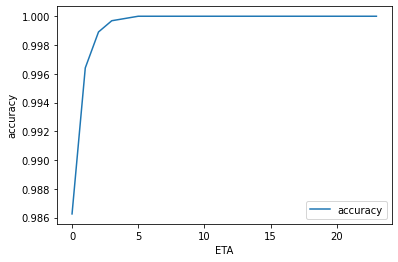

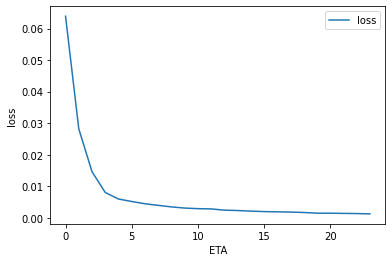

KeyError: ignored

In [ ]:
from matplotlib import pyplot as plt
def plot_graphs(history, string):
  plt.plot(history.history[string])
  #plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")
plot_graphs(history, "ETA")

In [ ]:
txt = ["A WeWork shareholder has taken the company to court over the near-$1.7bn (£1.3bn) leaving package approved for ousted co-founder Adam Neumann."]
seq = tokenizer.texts_to_sequences(txt)
padded = pad_sequences(seq, maxlen=max_length)
pred = model.predict(padded)
pred

array([[0.00098079, 0.19799298, 0.0012951 , 0.00320101, 0.18809798,
        0.6084321 ]], dtype=float32)

In [ ]:
txt = ["A WeWork shareholder has taken the company to court over the near-$1.7bn (£1.3bn) leaving package approved for ousted co-founder Adam Neumann."]
seq = tokenizer.texts_to_sequences(txt)
padded = pad_sequences(seq, maxlen=max_length)
pred = model.predict(padded)
labels = ['sport', 'bussiness', 'politics', 'tech', 'entertainment','unknown']
print(pred, labels[np.argmax(pred)])

[[0.00098079 0.19799298 0.0012951  0.00320101 0.18809798 0.6084321 ]] unknown


In [ ]:
np.argmax(pred)

5

In [ ]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.Collecting tensorflow


distutils: C:\Users\parth\anaconda\Include\UNKNOWN
sysconfig: C:\Users\parth\anaconda\Include
user = False
home = None



  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached flatbuffers-1.12-py2.py3-none-any.whl (15 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)

root = None
prefix = None
distutils: C:\Users\parth\anaconda\Include\UNKNOWN
sysconfig: C:\Users\parth\anaconda\Include
user = False
home = None
root = None
prefix = None
You should consider upgrading via the 'C:\Users\parth\anaconda\python.exe -m pip install --upgrade pip' command.



  Attempting uninstall: grpcio
    Found existing installation: grpcio 1.32.0
    Uninstalling grpcio-1.32.0:
      Successfully uninstalled grpcio-1.32.0
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.4.0
    Uninstalling tensorflow-estimator-2.4.0:
      Successfully uninstalled tensorflow-estimator-2.4.0
  Attempting uninstall: h5py
    Found existing installation: h5py 2.10.0
    Uninstalling h5py-2.10.0:
      Successfully uninstalled h5py-2.10.0
